In [1]:
%%html
<style> 
table {display: block;} 
td {
  font-size: 20px
}
.rendered_html { font-size: 20px; }
*{ line-height: 200%; }
</style>
<style type="text/css" media="print"> body { -webkit-print-color-adjust: exact; } </style>

# Natural Language Processing and the Web WS 2022/23 - Practice Class - <span style="color:blue">Tutorial 3</span>

We have seen in the previous practice classes how to access text data and tokenization issues. In this section, we will cover the following topics: 
## Contents
* <span style="color:blue"> Revision </span> - Lemmatization and POS tagging
* <span style="color:blue">Parsing and Chunking</span> text documents 
* Description of building small Ontology using <span style="color:blue">Hearst Pattern</span> (<span style="color:red"> Assignment can be done in group!</span>)

## Lemmatization
A lemma is the canonical, <span style="color:blue">uninflected</span> or <span style="color:blue">dictionary form</span> of a word. For example, the lemma of <span style="color:blue">small</span><span style="color:red">est</span> is <span style="color:blue">small,</span> and the lemma of <span style="color:blue">eat</span><span style="color:red">ing</span> is <span style="color:blue">eat.</span> In many languages, the lemma for nouns is the <span style="color:blue">nominative singula</span>r form, the lemma for adjectives is the <span style="color:blue">nominative singular</span></span> positive form, and the lemma for verbs is the <span style="color:blue">infinitive.</span> But given an inflected form, finding the lemma (a process called <span style="color:blue">lemmatization</span>) is not always as easy. Words often undergo regular spelling changes when inflected for example, in English, verbs and adjectives ending in -e often drop this letter when inflecting: <span style="color:blue">bake → baking</span>. Sometimes final consonants are doubled, as in (British) English <span style="color:blue">travel → travelling</span>. 

An accurate algorithm for lemmatization must be aware of these sorts of inflectional rules and know how to undo them to arrive at the <span style="color:blue">base form</span> of the word. It must also know about completely irregular cases, such as <span style="color:blue">go → went</span>, <span style="color:blue">mouse → mice</span>, and <span style="color:blue">good → better</span>. Lemmatization is a difficult task for computers, and requires some basic understanding of the grammatical context and properties of the word. For example, the lemma of <span style="color:blue">dove</span> depends on whether the word is being used as a noun (as in the <span style="color:blue">bird</span>) or a verb (as in the past tense of <span style="color:blue">dive</span>).
![dove.jpg](dove.jpg) ![dive.png](dive.png)

However, lemmatization is an important task because, as with part-of-speech tagging, many NLP applications rely on lemmatized text.

Examples of lemmatization:
>```rocks : rock
corpora : corpus
better : good```

## NLTK Lemmatizer

#### optional  --> coloring outputs
```
COLOR = {
    'blue': '\033[94m',
    'default': '\033[99m',
    'grey': '\033[90m',
    'yellow': '\033[93m',
    'black': '\033[90m',
    'cyan': '\033[96m',
    'green': '\033[92m',
    'magenta': '\033[95m',
    'white': '\033[97m',
    'red': '\033[91m'
}
```

In [2]:
HR='\033[91m' # hilight in red
HD ='\x1b[0m'# hilight in default

In [3]:
import nltk
# Lemmatize using WordNet's buil-in morphy function
# Returns the input unchanged if it cannot be found in WordNet
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print("rocks :"+HR, lemmatizer.lemmatize("rocks") + HD)
print("corpora :"+HR, lemmatizer.lemmatize("corpora") +HD)
#Give the POS tag as a context to the tager,  a denotes adjective in "pos" 
print("better :"+HR, lemmatizer.lemmatize("better", pos ="a") +HD)
print("drove of verb :"+HR, lemmatizer.lemmatize("drove", pos ="v") +HD)
print("drove as noun (bird): :"+HR, lemmatizer.lemmatize("drove", pos ="n") +HD)
#Lemmatizing sentence
sentence = "The striped bats are hanging on their feet for best"
word_list = nltk.word_tokenize(sentence)
print("words:",word_list)
# Lemmatize list of words and join
lemmatized_output = ',   '.join([lemmatizer.lemmatize(w) for w in word_list])
print("lemma: "+HR,lemmatized_output)

rocks : rock
corpora : corpus
better : good
drove of verb : drive
drove as noun (bird): : drove
words: ['The', 'striped', 'bats', 'are', 'hanging', 'on', 'their', 'feet', 'for', 'best']
lemma:  The,   striped,   bat,   are,   hanging,   on,   their,   foot,   for,   best


## spaCy Lemmatizer

In [4]:
import spacy
# Initialize spacy 'en_core_web_sm' model, keeping only tagger component needed for lemmatization
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
sentence = "The striped bats are hanging on their feet for best"
# Parse the sentence using the loaded 'English' model object `nlp`
doc = nlp(sentence)
# Extract the lemma for each token and join
print(" ".join(["[" + token.text+"-->"+HR+token.lemma_ + HD for token in doc]))

[The-->the [striped-->striped [bats-->bat [are-->be [hanging-->hang [on-->on [their-->their [feet-->foot [for-->for [best-->good


## TextBlob Lemmatizer

In [5]:
from textblob import TextBlob, Word
# Lemmatize a word, use the WordNet's morphy function
word = 'stripes'
w = Word(word)
print(word +" " + HR+w.lemmatize())

stripes stripe


In [6]:
# Lemmatize a sentence
sentence = "The striped bats are hanging on their feet for best"
sent = TextBlob(sentence)
print(" ". join(["["+ w+"-->"+HR+w.lemmatize()+"]"+HD for w in sent.words]))

[The-->The] [striped-->striped] [bats-->bat] [are-->are] [hanging-->hanging] [on-->on] [their-->their] [feet-->foot] [for-->for] [best-->best]


## Parts of speech tagging with NLTK
Part-of-speech tagging (POS tagging) is the process of marking up the words in a text with their corresponding part of speech (e.g., <span style="color:blue">noun, verb, adjective</span>). For example, take the following sentence:


 <span style="color:blue">A dog had seen the cutest ferrets.</span> 
 
A tokenizer would split it into the following tokens:
![token.png](token.png)
A part-of-speech tagger could then assign labels, or tags, to the tokens according to their respective
parts of speech:
![pos.png](pos.png)
The <span style="color:blue">Penn Treebank tags</span> used here are as follows:
<span style="color:blue">DT</span> determiner <span style="color:blue">NN</span> noun, singular or mass <span style="color:blue">VBD</span> verb, past tense
<span style="color:blue">JJS</span> adjective, superlative <span style="color:blue">NNS</span> noun, plural <span style="color:blue">VBN</span> verb, past participle

The inventory from which these POS tags are drawn varies from <span style="color:blue">language to language</span>, and from <span style="color:blue">application to application</span>.

NLTK includes a Part-of-speech tagger, which assign a <span style="color:blue">tag</span>, or <span style="color:blue">word class</span>, or <span style="color:blue">lexical category</span> for a given token in a text. The default POS tagset for English is based on [PennTreebank tagset<](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html). 

NLTK also include the [Universal POS tagset](https://universaldependencies.org/u/pos/)

In [7]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tag import pos_tag
import nltk
text = "I saw a man sawing the tree with a saw. He can't finish it ontime."
sentences = sent_tokenize(text)
for sentence in sentences:
    for token, pos in pos_tag(word_tokenize(sentence)):
        print(token +" " + HR + pos + HD)
# to get information about a given tag
print("=====")
nltk.help.upenn_tagset("VB")

I PRP
saw VBD
a DT
man NN
sawing VBG
the DT
tree NN
with IN
a DT
saw NN
. .
He PRP
ca MD
n't RB
finish VB
it PRP
ontime RB
. .
=====
VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...


In [8]:
# you can also decide to use the Universal POS tagset
for sentence in sentences:
    for token, pos in pos_tag(word_tokenize(sentence), tagset='universal'):
        print(token +" "+ HR + pos + HD)  

I PRON
saw VERB
a DET
man NOUN
sawing VERB
the DET
tree NOUN
with ADP
a DET
saw NOUN
. .
He PRON
ca VERB
n't ADV
finish VERB
it PRON
ontime ADV
. .


## Parts of speech tagging with spaCy

In [9]:
import spacy 
import pprint
# Load English tokenizer, tagger,  
# parser, NER and word vectors 
nlp = spacy.load("en_core_web_sm") 
text = ("I saw a man sawing the tree with a saw. He can't finish it ontime!") 
doc = nlp(text) 
# Print token and Tag 
for token in doc: 
    print(str(token)+" "+HR+  str(token.pos_) + HD) 
# Example list of Verb tokens 
print("Verbs:", [token.text for token in doc if token.pos_ == "VERB"]) 


I PRON
saw VERB
a DET
man NOUN
sawing VERB
the DET
tree NOUN
with ADP
a DET
saw NOUN
. PUNCT
He PRON
ca AUX
n't PART
finish VERB
it PRON
ontime ADV
! PUNCT
Verbs: ['saw', 'sawing', 'finish']


## Parts of speech tagging with TextBlob

In [10]:
from textblob import TextBlob 
text = ("I saw a man sawing the tree with a saw. He can't finish it ontime!")   
# create a textblob object 
blob_object = TextBlob(text) 
# print word with pos tag. 
for word, pos in blob_object.tags:
    print(word +" " +HR + pos + HD)

I PRP
saw VBD
a DT
man NN
sawing VBG
the DT
tree NN
with IN
a DT
saw NN
He PRP
ca MD
n't RB
finish VB
it PRP
ontime RB


---
---

## Parsing vs. chunking 
Parsing is the process of analyzing a text to determine its <span style="color:blue">grammatical structure</span>. It goes beyond part-of-speech tagging (though that is often a first step) by grouping words within sentences into <span style="color:blue">hierarchical grammatical structures</span>. Here is a possible parse tree for the example sentence "<span style="color:blue">A dog had seen the cutest ferrets.</span>"
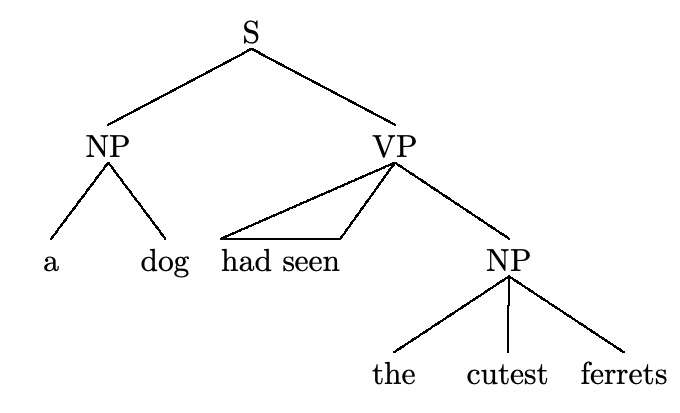

Proper parsing is a hard problem in computational linguistics. While identifying some sort of sentence structure is important for many NLP applications, not all of them require something as detailed and complicated as a parse tree. <span style="color:blue">Chunking</span>, also known as <span style="color:blue">shallow parsing</span>, is a simplified form of sentence analysis which identifies basic constituents (noun groups, verb groups, etc.) but does not specify their internal structure.
For the POS-tagged sentence example above, a chunker might identify noun chunks (<span style="color:blue">NC</span>) and verb complexes (<span style="color:blue">VC</span>) as follows:
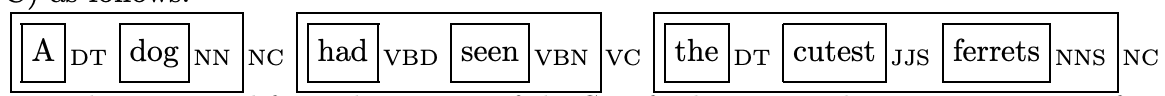

## Chunking with NLTTK
Chunking works on top of POS tagging, it uses pos-tags as input and provides chunks as output. 

We can create <span style="color:blue">rules</span> to create <span style="color:blue">noun phrase</span>, for example, we can define noun phrase chunking as an optional determiner (<span style="color:blue">DT</span>) followed by any number of adjectives (<span style="color:blue">JJ</span>) and then a noun (<span style="color:blue">NN</span>).

In [11]:
import nltk
sentence = "the little yellow dog barked at the cat."
#Define your grammar using regular expressions
grammar = ("Noun-Chunk: {<DT>?<JJ>*<NN>} # NP")
chunkParser = nltk.RegexpParser(grammar)
postags = nltk.pos_tag(nltk.word_tokenize(sentence))
for word, pos in postags:
    print(word +" " + HR+ pos + HD)
tree = chunkParser.parse(postags)
for subtree in tree.subtrees():
    print(subtree)
tree.draw()

the DT
little JJ
yellow JJ
dog NN
barked VBD
at IN
the DT
cat NN
. .
(S
  (Noun-Chunk the/DT little/JJ yellow/JJ dog/NN)
  barked/VBD
  at/IN
  (Noun-Chunk the/DT cat/NN)
  ./.)
(Noun-Chunk the/DT little/JJ yellow/JJ dog/NN)
(Noun-Chunk the/DT cat/NN)


The above code will draw the parsed tree structure (with chunk labels) of the sentence. It should look like the following
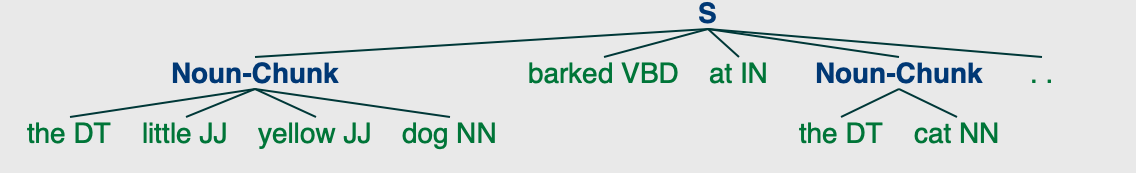

In [12]:
# another noun-chunk pattern 
# 1) DT or PP$ followed by JJ and end by NN or 
# 2) a number of proper noun sequences NNP+
grammar = r"""
  Noun-Chunk: {<DT|PP\$>?<JJ>*<NN>}   # chunk determiner/possessive, adjectives and noun
      {<NNP>+}                # chunk sequences of proper nouns
"""
cp = nltk.RegexpParser(grammar)
sentence = "Rapunzel let down her long golden hair."
postags = nltk.pos_tag(nltk.word_tokenize(sentence))
tree = cp.parse(postags)
print(tree)
tree.draw()

(S
  (Noun-Chunk Rapunzel/NNP)
  let/VBD
  down/RP
  her/PRP$
  (Noun-Chunk long/JJ golden/JJ hair/NN)
  ./.)


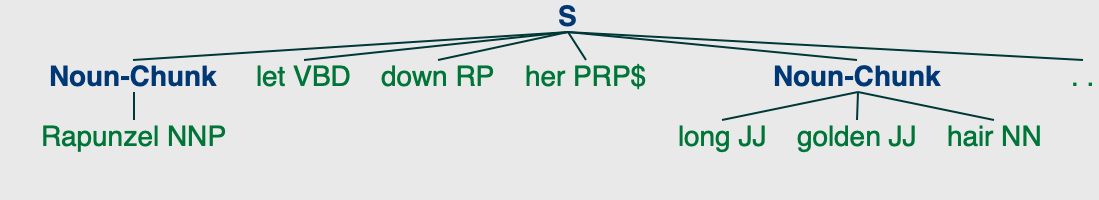

In [13]:
# List verb chunks from the brown corpus
cp = nltk.RegexpParser('Verb-chunk: {<V.*> <TO> <V.*>}')
brown = nltk.corpus.brown
verbchunks = [] 
for sent in brown.tagged_sents():
    tree = cp.parse(sent)
    for subtree in tree.subtrees():
        if subtree.label() == 'Verb-chunk': 
            verbchunks.append(subtree)
# print the first ten chunks 
print(verbchunks[:10])
# draw the first Verb-chunk
verbchunks[0].draw()

[Tree('Verb-chunk', [('combined', 'VBN'), ('to', 'TO'), ('achieve', 'VB')]), Tree('Verb-chunk', [('continue', 'VB'), ('to', 'TO'), ('place', 'VB')]), Tree('Verb-chunk', [('serve', 'VB'), ('to', 'TO'), ('protect', 'VB')]), Tree('Verb-chunk', [('wanted', 'VBD'), ('to', 'TO'), ('wait', 'VB')]), Tree('Verb-chunk', [('allowed', 'VBN'), ('to', 'TO'), ('place', 'VB')]), Tree('Verb-chunk', [('expected', 'VBN'), ('to', 'TO'), ('become', 'VB')]), Tree('Verb-chunk', [('expected', 'VBN'), ('to', 'TO'), ('approve', 'VB')]), Tree('Verb-chunk', [('expected', 'VBN'), ('to', 'TO'), ('make', 'VB')]), Tree('Verb-chunk', [('intends', 'VBZ'), ('to', 'TO'), ('make', 'VB')]), Tree('Verb-chunk', [('seek', 'VB'), ('to', 'TO'), ('set', 'VB')])]


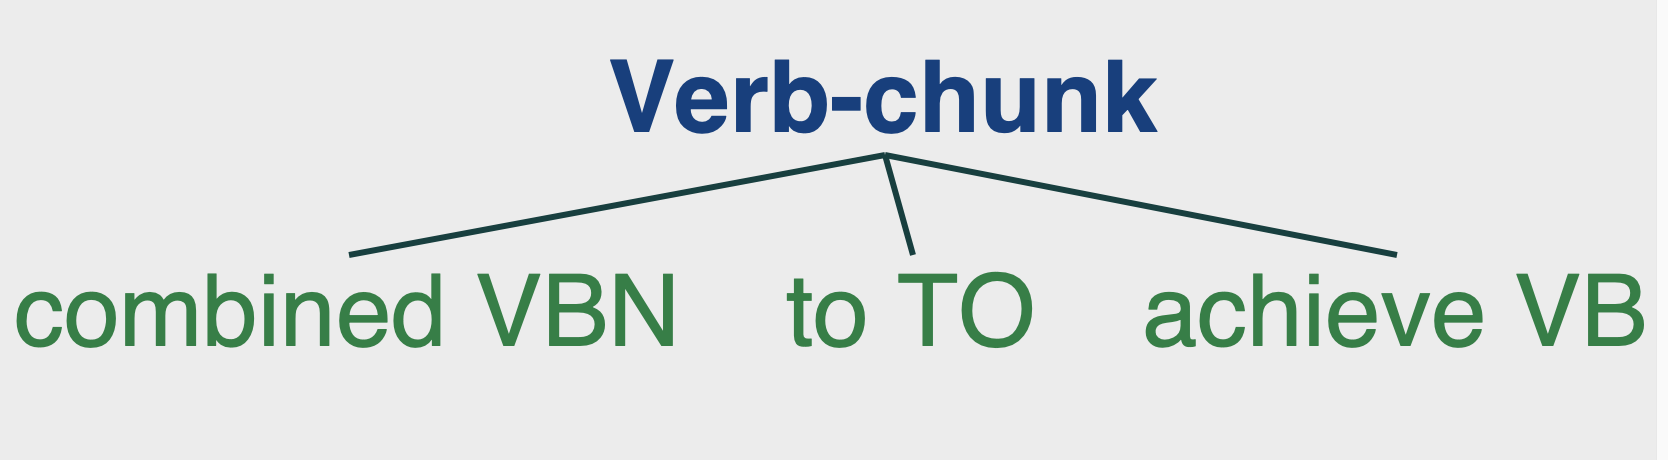

## Parsing and Chunking with spaCy
In <span style="color:blue">dependency parsing</span> the syntactic structure of a sentence is described solely in terms of directed <span style="color:blue">binary grammatical relations between the words</span>. Relations among the words are illustrated above the sentence with <span style="color:blue">directed, labeled arcs</span> from <span style="color:blue">heads</span> to <span style="color:blue">dependents</span>. We call this a **typed dependency structure** because in typed dependency the labels are drawn from a fixed inventory of grammatical relations. A <span style="color:blue">root</span> node explicitly marks the root of the tree, the head of the entire structure. Read more [here](https://web.stanford.edu/~jurafsky/slp3/14.pdf)

In [14]:
#Dependency parsing with spaCy
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(u"The cat and the dog sleep in the basket near the door.")
spacy.displacy.render(doc, style='dep')

## noun chunks in spaCy

In [15]:
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(u'The cat and the dog sleep in the basket near the door.')
for np in doc.noun_chunks:
    print(np.text)

The cat
the dog sleep
the basket
the door


## Chunking with TextBlob
TextBlob currently has two noun phrases chunker implementations, textblob.np_extractors.<span style="color:blue">FastNPExtractor</span> (default, based on [Shlomi Babluki’s implementation](https://thetokenizer.com/2013/05/09/efficient-way-to-extract-the-main-topics-of-a-sentence/) and textblob.np_extractors.<span style="color:blue">ConllExtractor</span>, which uses the CoNLL 2000 corpus to train a tagger.

In [16]:
from textblob import TextBlob
#from textblob.np_extractors import FastNPExtractor
from textblob.np_extractors import ConllExtractor
extractor = ConllExtractor()
sentence ="Swayy is a beautiful new dashboard for discovering and curating online content."
parse = TextBlob(sentence, np_extractor=extractor)
print(parse.noun_phrases)

['swayy', 'beautiful new dashboard', 'online content']


 # <span style="color:red"> Excercise  (15 pts)</span>
 ## Building small Ontology using Hearst Pattern
In this problem, you will employ the POS, lemma and chunking information to discover <span style="color:blue">lexical relationships</span> in a corpus.

<span style="color:blue">Hearst patterns</span> are lexico-syntactic patterns first used by [Marti Hearst](http://people.ischool.berkeley.edu/~hearst/papers/coling92.pdf) to discover <span style="color:blue"><span style="color:blue">hyponyms</span></span> in large text corpora. (A **hyponym** is a term which denotes a more specific or subordinate group of another term, called a  <span style="color:blue">hypernym</span>. For example, <span style="color:blue">tiger</span> is a hyponym of  <span style="color:blue">mammal</span>, which is in turn a hyponym of <span style="color:blue">animal</span>. Therefore animal is a hypernym of mammal, and mammal is a hypernym of tiger.) 

Hearst observed that certain linguistic constructions can be used to infer hyponymy relationships. For example, in the phrase “works by such <span style="color:blue">authors</span> as <span style="color:blue">Herrick</span>, <span style="color:blue">Goldsmith</span>, and <span style="color:blue">Shakespeare</span>”, it is obvious that Herrick, Goldsmith, and Shakespeare are all hyponyms of author. In general, any phrase of the pattern “<span style="color:blue">such NP0 as NP1, . . . , and NPn</span>” implies that the noun phrases NP1 through NPn are hyponyms of NP0. The following table shows some patterns originally proposed by Hearst, along with examples. 
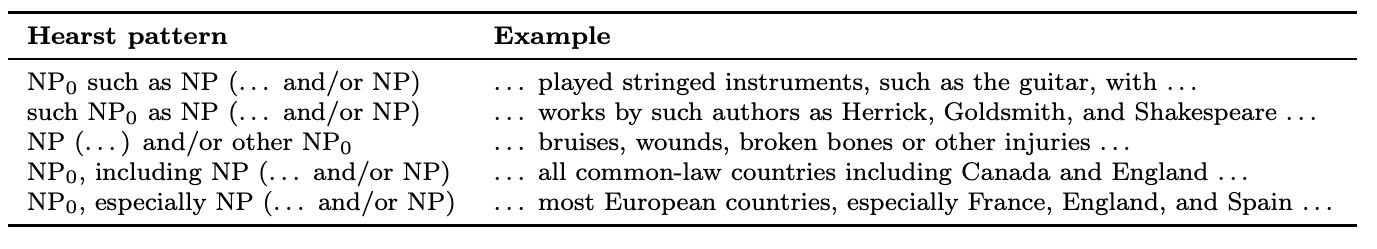

---
---

Write a Python program which looks for hyponyms by finding Hearst patterns in a collection of documents.

 1. Write a program that will read a file or list of files, iterate over each sentences and extract possible <span style="color:blue">hyponym/hypernym</span> relations.  <span style="color:red"> ( 10 pts)</span> 
 2. Once the relations are extracted, report the total number of relations/patterns as follows  <span style="color:red"> ( 5 pts)</span> :
* Print out the most commonly found <span style="color:blue">hyponym-hypernym relations</span>
 
Example output: 

|  count | Hyponym   | Hypernym |
|---|:----------|:---|
| 45  | house | building |
| 32   | Herrick  | author|
| 11  | France  |  country

* Print the top five most <span style="color:blue">productive Hearst patterns</span>

Example output:

|  count | Hearst pattern   | 
|---|:----------|
| 1302  | NP such as NP | 
| 800   | such NP as NP  | 
| 452  | NP, including NP  |  
| 121 | NP, especially NP |
| 32 | NP and/or other NP |

 In this exercise, you can use either <span style="color:blue">NLTK</span>, <span style="color:blue">TextBlob</span>, or <span style="color:blue">spaCy</span> chunkers, or a combination of them to implement Hearst Pattern. We will run your script to test sentences to determine how much patterns your implementation covers.
 
 You can use the corpus `wiki-1000.txt` in the folder `HearstPaternData`. You can compare your output to some of the files there such as `pattern_out_0.txt`.

## Resources
* [Learning POS Tagging & Chunking in NLP](https://medium.com/greyatom/learning-pos-tagging-chunking-in-nlp-85f7f811a8cb)
* [TextBlob Chunking](https://textblob.readthedocs.io/en/dev/advanced_usage.html#noun-phrase-chunkers)
* [Chunking in NLTK](https://www.nltk.org/book/ch07.html)
* [Hearst Pattern](file:///Users/seidmuhieyimam/Downloads/KEOD_2018_58_CR.pdf)
* [Dependency Parsing](https://web.stanford.edu/~jurafsky/slp3/14.pdf)